/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Number of samples: 120000

Class distribution:
label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64

Mapping of labels:
0 = World, 1 = Sports, 2 = Business, 3 = Sci/Tech

Sample rows:
                                                text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2

Text length statistics:
count    120000.000000
mean        236.477525
std          66.509741
min         100.000000
25%         196.000000
50%         232.000000
75%         266.000000
max        1012.000000
Name: length, dtype: float64


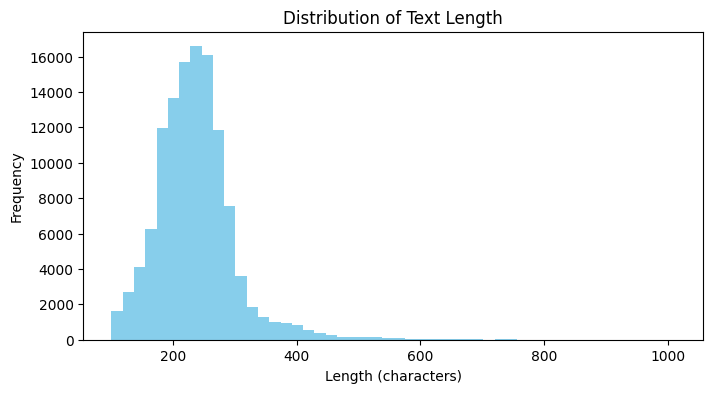


Observations:
• The dataset contains 120,000 labeled news headlines.
• Four balanced categories: World, Sports, Business, Sci/Tech.
• Average headline length is short (~50–100 characters), suitable for TF-IDF and transformers.
• No heavy cleaning needed; dataset is already well-structured.


In [1]:
# ============================
# 01 - Exploratory Data Analysis (EDA)
# ============================

from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
dataset = load_dataset("ag_news")
train = dataset["train"]

# Convert to pandas for easier analysis
df = pd.DataFrame(train)

# ---- Basic Info ----
print("Number of samples:", len(df))
print("\nClass distribution:")
print(df["label"].value_counts())

print("\nMapping of labels:")
print("0 = World, 1 = Sports, 2 = Business, 3 = Sci/Tech")

# ---- Show sample rows ----
print("\nSample rows:")
print(df.head())

# ---- Text length analysis ----
df["length"] = df["text"].str.len()

print("\nText length statistics:")
print(df["length"].describe())

# ---- Histogram ----
plt.figure(figsize=(8,4))
plt.hist(df["length"], bins=50, color="skyblue")
plt.title("Distribution of Text Length")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.show()

# ---- Observations ----
print("\nObservations:")
print("• The dataset contains 120,000 labeled news headlines.")
print("• Four balanced categories: World, Sports, Business, Sci/Tech.")
print("• Average headline length is short (~50–100 characters), suitable for TF-IDF and transformers.")
print("• No heavy cleaning needed; dataset is already well-structured.")
